<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Sep8-9/Ejercicio9Sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Importamos las librerias necesarias
import pandas as pd
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image
from csv import reader
from pandas.core.api import DataFrame

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
df = pd.read_csv("/content/drive/MyDrive/Data/CarPrice_Assignment.csv")

In [3]:
# df means 'data frame'
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Verificamos el tamaño de los datos
df.shape

(205, 26)

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 1. Separate Numerical and Categorical data

In [7]:
# Separate Numerical and Categorical data
# Podemos crear arreglos de la columna deseada de la siguiente forma

# Numercial Data: |car_ID|, |symboling|, |wheelbase|, |enginesize|, |boreratio|, |stroke|, |compresratio|, |horsepower|, |peakrpm|, |citympg|, |highwaympg|, |price|

carID = df['car_ID'].astype(int).values
symboling = df['symboling'].astype(int).values
wheelbase = df['wheelbase'].astype(float).values
enginsize = df['enginesize'].astype(int).values
boreratio = df['boreratio'].astype(float).values
stroke = df['stroke'].astype(float).values
compresratio = df['compressionratio'].astype(float).values
horsepower = df['horsepower'].astype(int).values
peakrpm = df['peakrpm'].astype(int).values
citympg = df['citympg'].astype(int).values
highwaympg = df['highwaympg'].astype(int).values
price = df['price'].astype(float).values

# Categorical Data: |CarName|, |fueltype|, |aspiration|, |doornumber|, |carbody|, |drivewheel|, |enginelocation|, |fuelsystem|

carName = df['CarName'].astype(object).values
fuelType = df['fueltype'].astype(object).values
aspiration = df['aspiration'].astype(object).values
doornumber = df['doornumber'].astype(object).values
carbody = df['carbody'].astype(object).values
drivewheel = df['drivewheel'].astype(object).values
enginelocation = df['enginelocation'].astype(object).values
fuelsystem = df['fuelsystem'].astype(object).values

In [8]:
# Observamos que tipos de datos tenemos para poder clasificarlos
df.info() # Todos los datos tipo 'object' son categoricos y los demas datos son numericos ya que son 'int64' o 'float64'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# 2.Analiza la dependencia del valor del auto como función de cada variable categorica

In [9]:
# Analiza la dependencia del valor del auto como función de cada variable categorica

# Separamos el nombre de la compañia de la columna CarName
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3, "Compañia", CompanyName)
df.drop(['CarName'], axis=1, inplace=True)
df.head()

,car_ID,symboling,Compañia,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Ahora tenemos el dato necesario, pero algunos nombres de marca contienen errores
df.Compañia.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
# Necesitamos arreglar los errores, creamos una funcion para ello
df.Compañia = df.Compañia.str.lower()

def replace_name(a,b):
  df.Compañia.replace(a, b, inplace=True)

replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

# Verificamos que corregimos todos los errores
df.Compañia.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

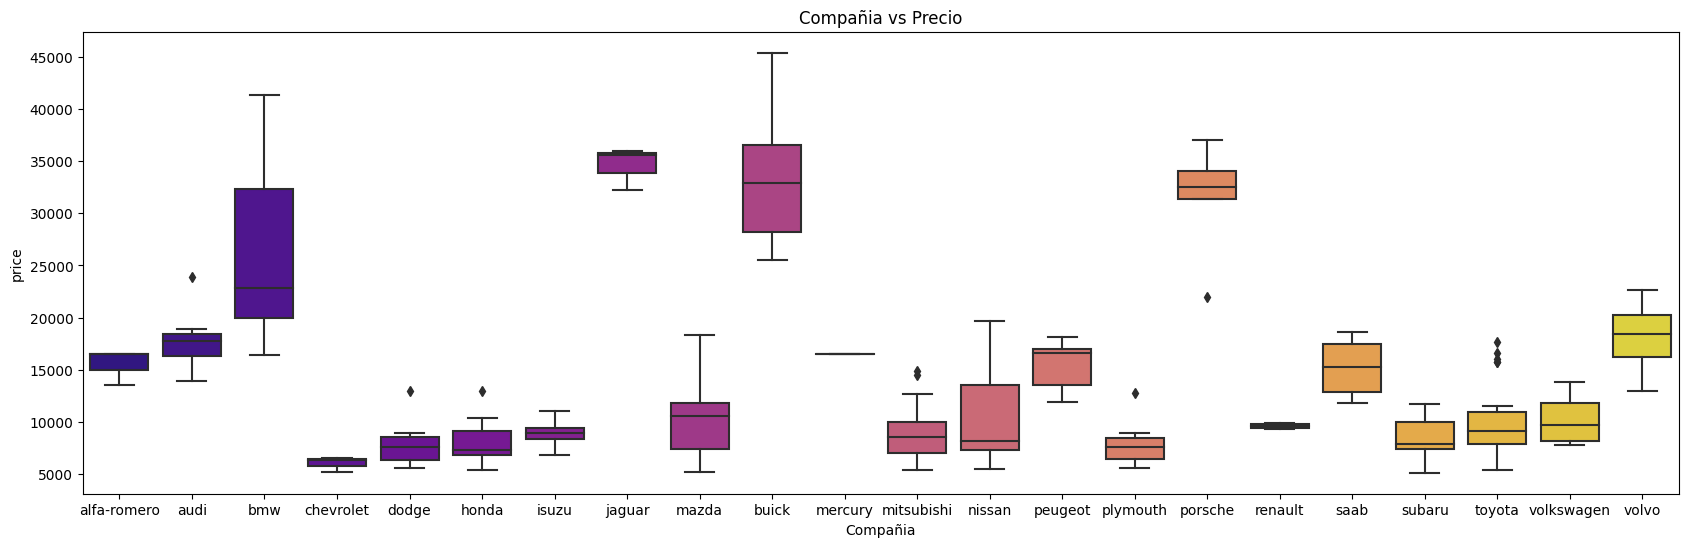

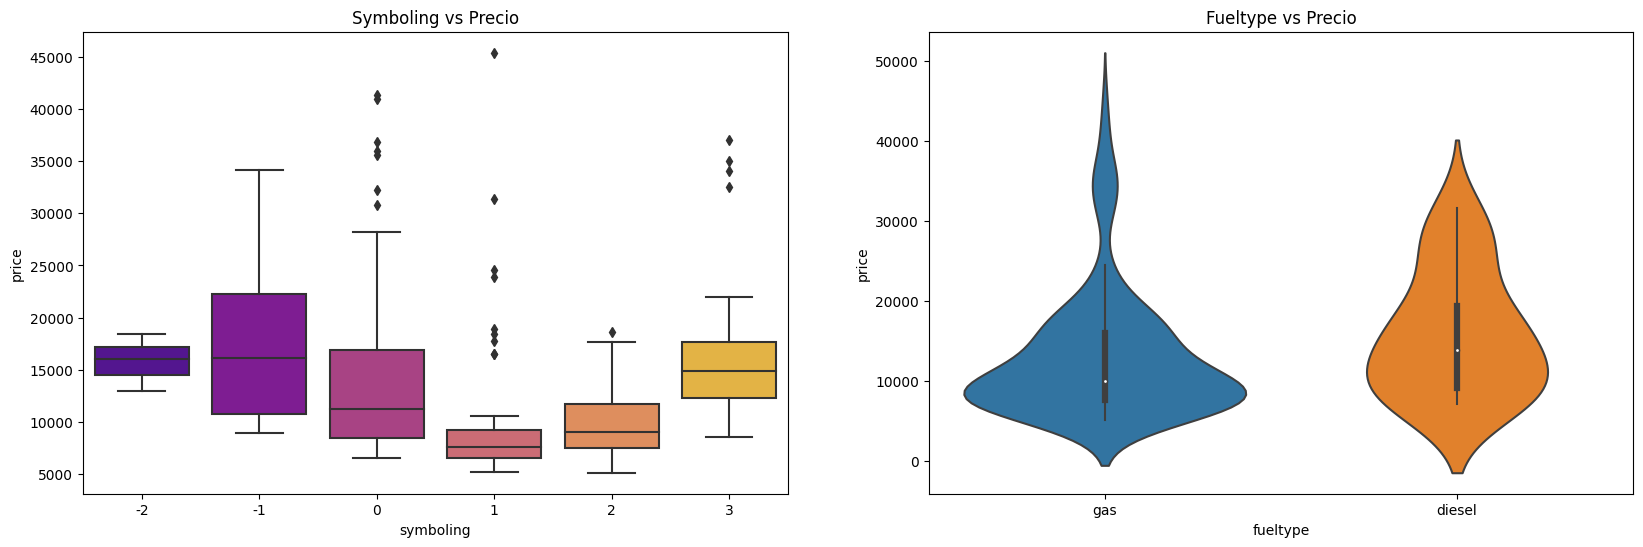

In [12]:
# Ahora podemos visualizar los datos con respecto al precio

# Primero la Compañia vs Precio
plt.figure(figsize=(70,6))

plt.subplot(1,3,1)
plt.title('Compañia vs Precio')
sns.boxplot(x=df.Compañia, y=df.price, palette=("plasma"))

# Symboling vs Precio
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Symboling vs Precio')
sns.boxplot(x=df.symboling, y=df.price, palette=("plasma"))

# Fueltype vs Precio
plt.subplot(1,2,2)
plt.title('Fueltype vs Precio')
sns.violinplot(x=df["fueltype"], y=df["price"])

plt.show()

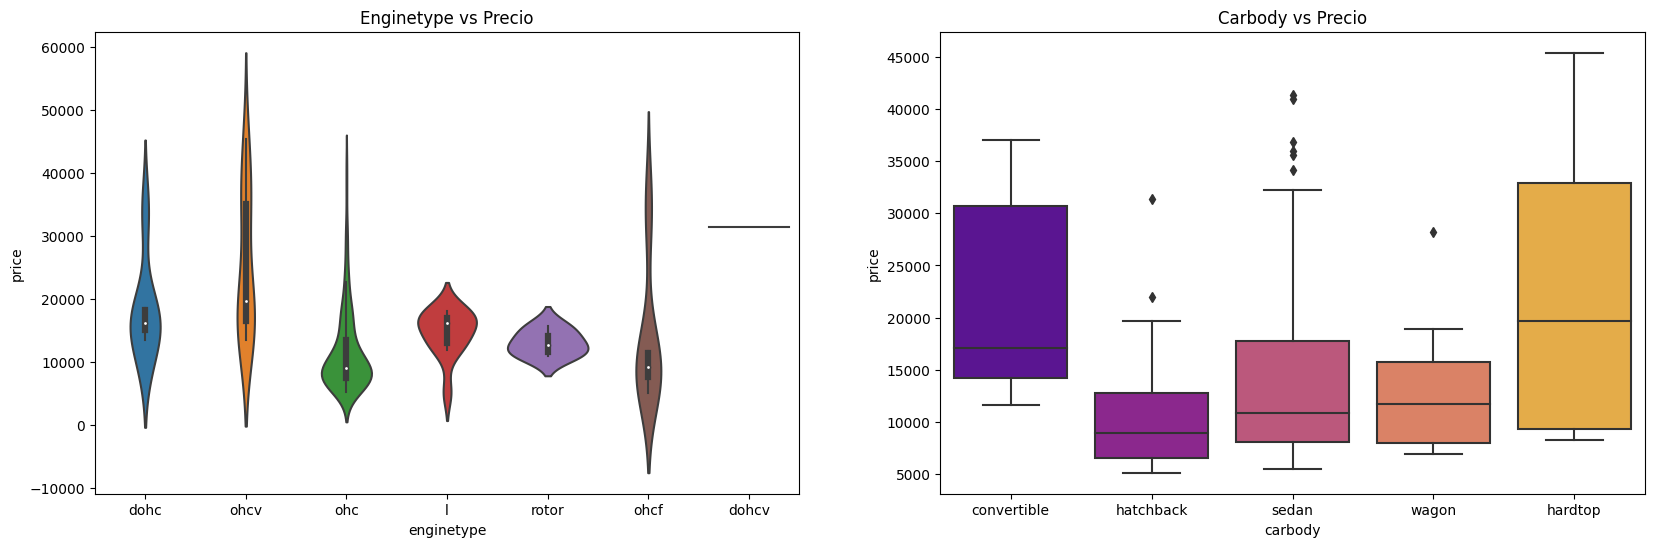

In [13]:
plt.figure(figsize=(20,6))

# Enginetype vs Precio
plt.subplot(1,2,1)
plt.title('Enginetype vs Precio')
sns.violinplot(x=df["enginetype"], y=df["price"])

# Carbody vs Precio
plt.subplot(1,2,2)
plt.title('Carbody vs Precio')
sns.boxplot(x=df.carbody, y=df.price, palette=("plasma"))

plt.show()

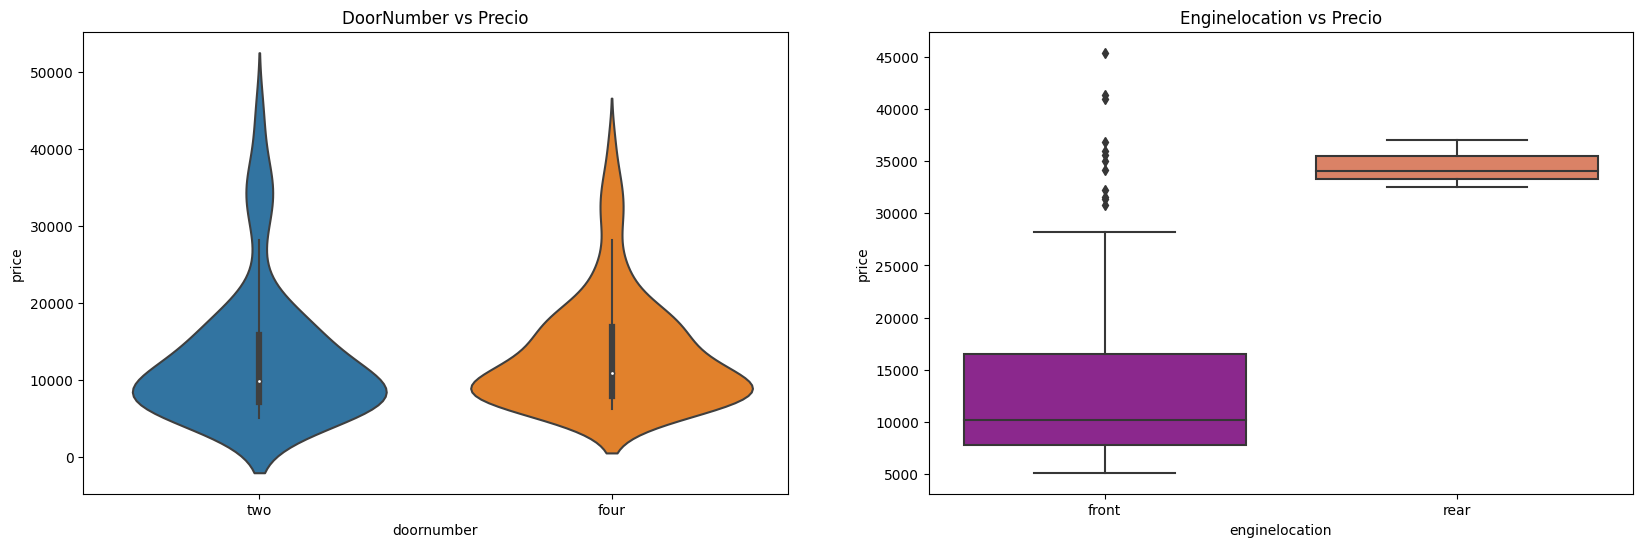

In [14]:
plt.figure(figsize=(20,6))

# Doornumber vs Precio
plt.subplot(1,2,1)
plt.title('DoorNumber vs Precio')
sns.violinplot(x=df["doornumber"], y=df["price"])

# Enginelocation vs Precio
plt.subplot(1,2,2)
plt.title('Enginelocation vs Precio')
sns.boxplot(x=df.enginelocation, y=df.price, palette=("plasma"))

plt.show()

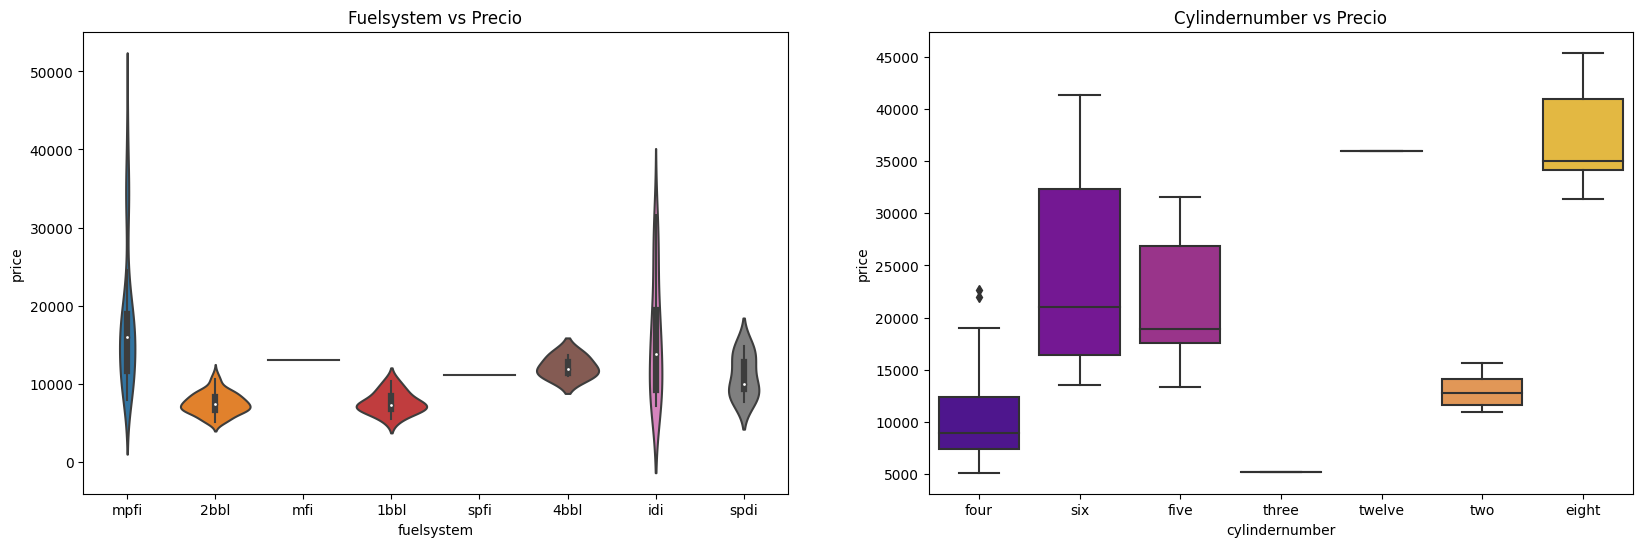

In [15]:
plt.figure(figsize=(20,6))

# Fuelsystem vs Precio
plt.subplot(1,2,1)
plt.title('Fuelsystem vs Precio')
sns.violinplot(x=df["fuelsystem"], y=df["price"])

# Cylindernumber vs Precio
plt.subplot(1,2,2)
plt.title('Cylindernumber vs Precio')
sns.boxplot(x=df.cylindernumber, y=df.price, palette=("plasma"))

plt.show()

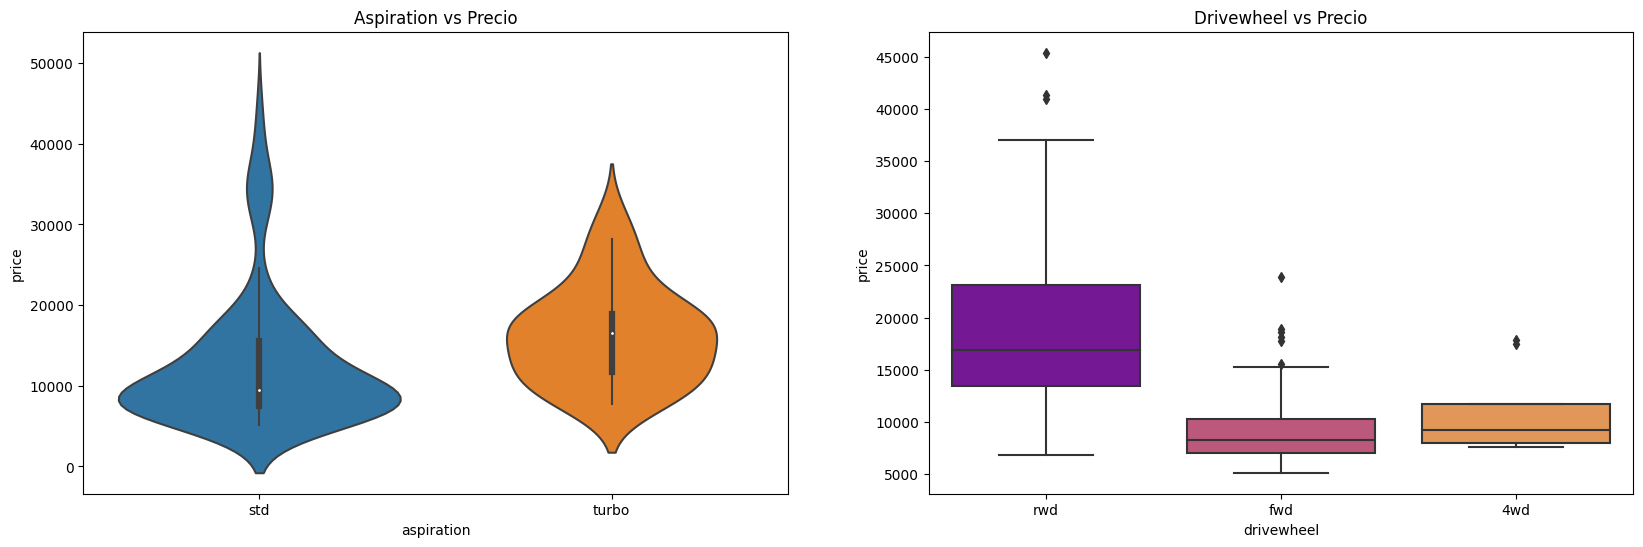

In [16]:
plt.figure(figsize=(20,6))

# Aspiration vs Precio
plt.subplot(1,2,1)
plt.title('Aspiration vs Precio')
sns.violinplot(x=df["aspiration"], y=df["price"])

# Drivewheel vs Precio
plt.subplot(1,2,2)
plt.title('Drivewheel vs Precio')
sns.boxplot(x=df.drivewheel, y=df.price, palette=("plasma"))

plt.show()

<Figure size 2500x600 with 0 Axes>

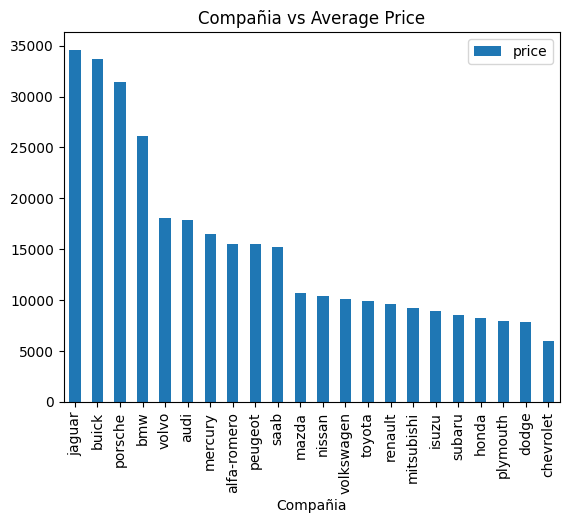

In [17]:
# Tambien podemos visualizar las varibales categoricas en una grafica de barras con respecto al precio promedio

plt.figure(figsize=(25, 6))

labels = ['Compañia','symboling','fueltype','enginetype','carbody','doornumber','enginelocation','fuelsystem','cylindernumber','aspiration','drivewheel']

#for i in range(10):
#  df2 = pd.DataFrame(df.groupby(labels[i])['price'].mean().sort_values(ascending = False))
#  df2.plot.bar()
#  plt.title(' vs Average Price')
#  plt.show()

df2 = pd.DataFrame(df.groupby(['Compañia'])['price'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Compañia vs Average Price')
plt.show()

# 3. Analiza la dependencia del valor del auto como función de cada variable numerica

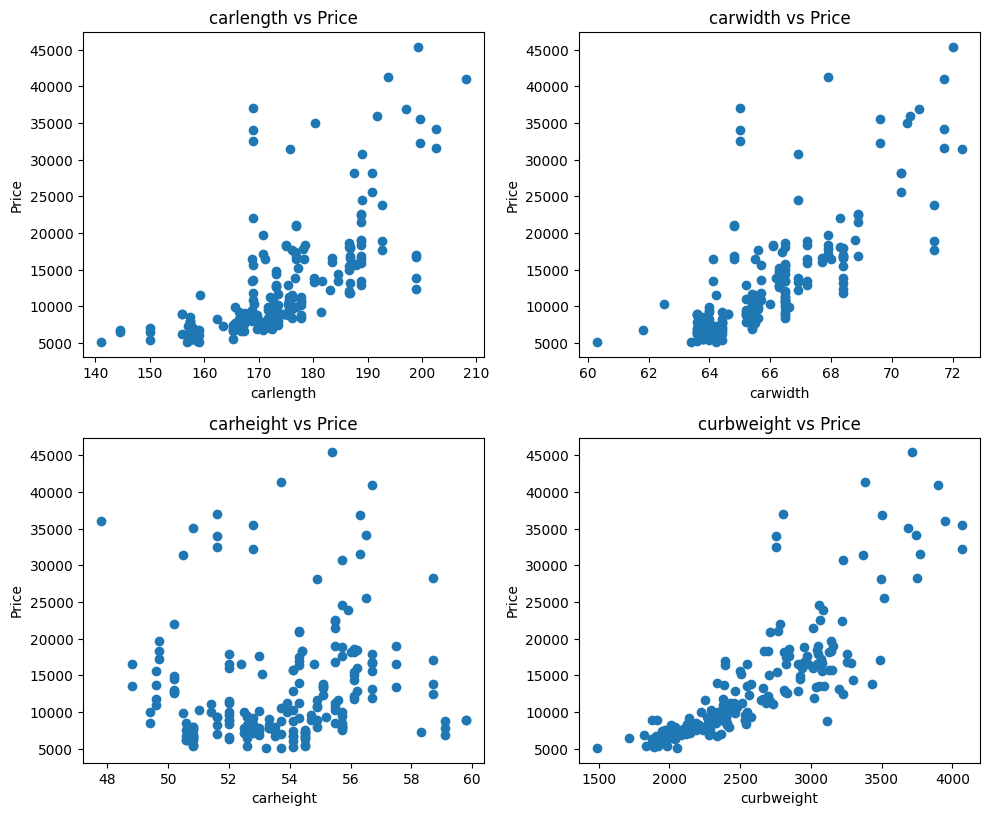

In [18]:
# Analiza la dependencia del valor del auto como función de cada variable numerica

def scatter(x,fig):
  plt.subplot(5,2,fig)
  plt.scatter(df[x],df['price'])
  plt.title(x+' vs Price')
  plt.ylabel('Price')
  plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

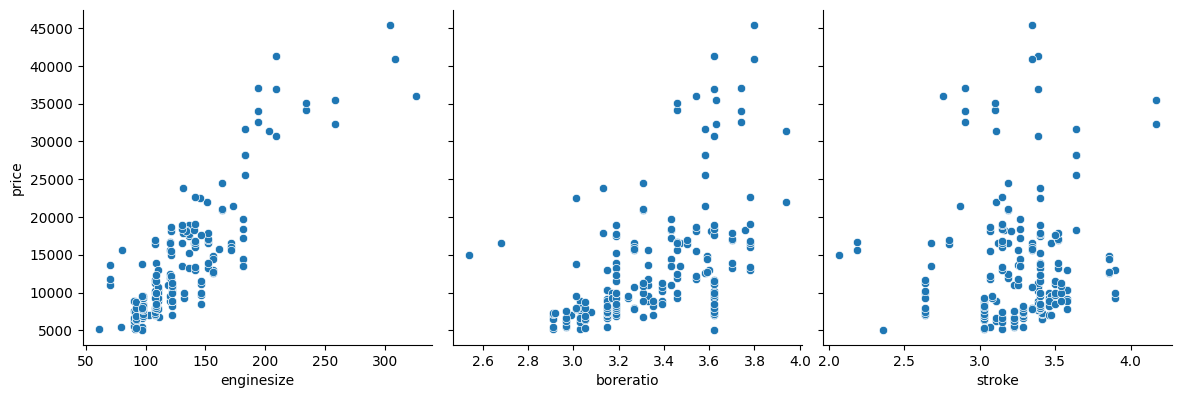

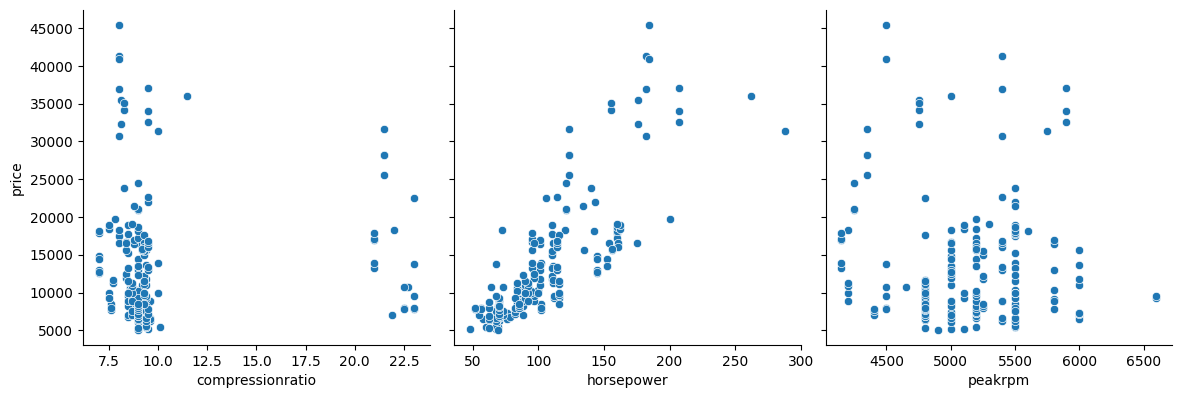

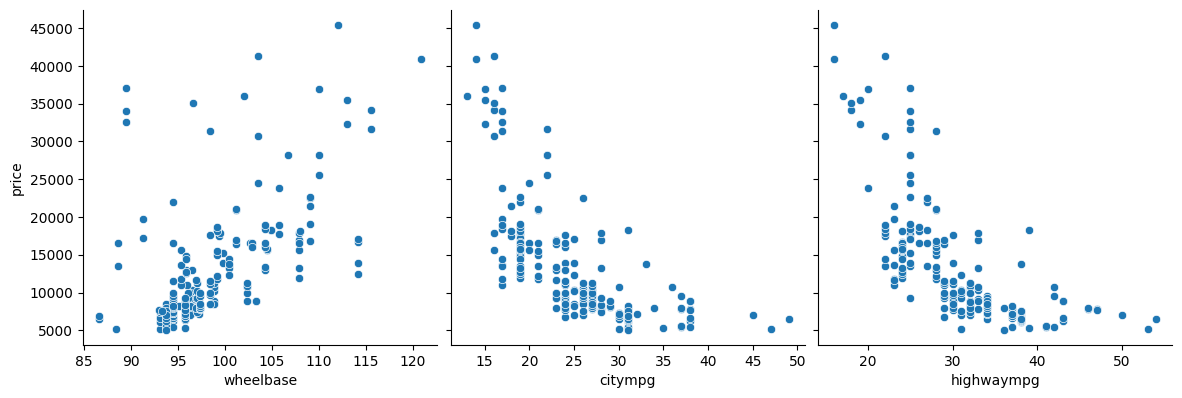

In [19]:
# Con Seaborn podemos graficar de forma similar, siendo para este caso mas eficiente
def pp(x,y,z):
  sns.pairplot(df, x_vars=[x,y,z], y_vars='price', size=4, aspect=1, kind='scatter')
  plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

# 4. Define que variables numericas y categoricas usarás para crear tu modelo lineal.

In [58]:
# Define que variables numericas y categoricas usarás para crear tu modelo lineal.

# De acuerdo a las graficas realizadas, la lista de variables significas son:

use_vars = df[['price', 'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]

categorical_vars = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'cylindernumber','enginetype']]

all_vars = df[['price', 'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'cylindernumber','enginetype']]

In [45]:
all_vars.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype,aspiration,carbody,drivewheel,cylindernumber,enginetype
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,gas,std,convertible,rwd,four,dohc
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,gas,std,convertible,rwd,four,dohc
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,gas,std,hatchback,rwd,six,ohcv
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,gas,std,sedan,fwd,four,ohc
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,gas,std,sedan,4wd,five,ohc


In [21]:
use_vars.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4


In [22]:
categorical_vars.head()

,fueltype,aspiration,carbody,drivewheel,cylindernumber,enginetype
0,gas,std,convertible,rwd,four,dohc
1,gas,std,convertible,rwd,four,dohc
2,gas,std,hatchback,rwd,six,ohcv
3,gas,std,sedan,fwd,four,ohc
4,gas,std,sedan,4wd,five,ohc


# 5. Convierte las variables categoricas en variables "dummy" usando el siguiente código

In [59]:
# Convierte las variables categoricas en variables "dummy" usando el siguiente código

#df = df[use_vars]
#df = pd.get_dummies(df,columns=categorical_vars,drop_first=True)

# Creamos una funcion para convertir las varibles categoricas en dummies
def dummies(x, dff):
    temp = pd.get_dummies(dff[x], drop_first=True)
    dff = pd.concat([dff, temp], axis=1)
    dff.drop([x], axis = 1, inplace=True)
    return dff

categorical_vars = dummies('fueltype', categorical_vars)
categorical_vars = dummies('aspiration', categorical_vars)
categorical_vars = dummies('carbody', categorical_vars)
categorical_vars = dummies('drivewheel', categorical_vars)
categorical_vars = dummies('enginetype', categorical_vars)
categorical_vars = dummies('cylindernumber', categorical_vars)

all_vars = dummies('fueltype', all_vars)
all_vars = dummies('aspiration', all_vars)
all_vars = dummies('carbody', all_vars)
all_vars = dummies('drivewheel', all_vars)
all_vars = dummies('enginetype', all_vars)
all_vars = dummies('cylindernumber', all_vars)

In [60]:
categorical_vars.head()

,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [55]:
all_vars.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,1,0,0,0,1,0,0,0,0,0


In [56]:
all_vars.shape

(205, 28)

# 6. Checa la correlación entre todas las variables usando un "heat map"

<Axes: >

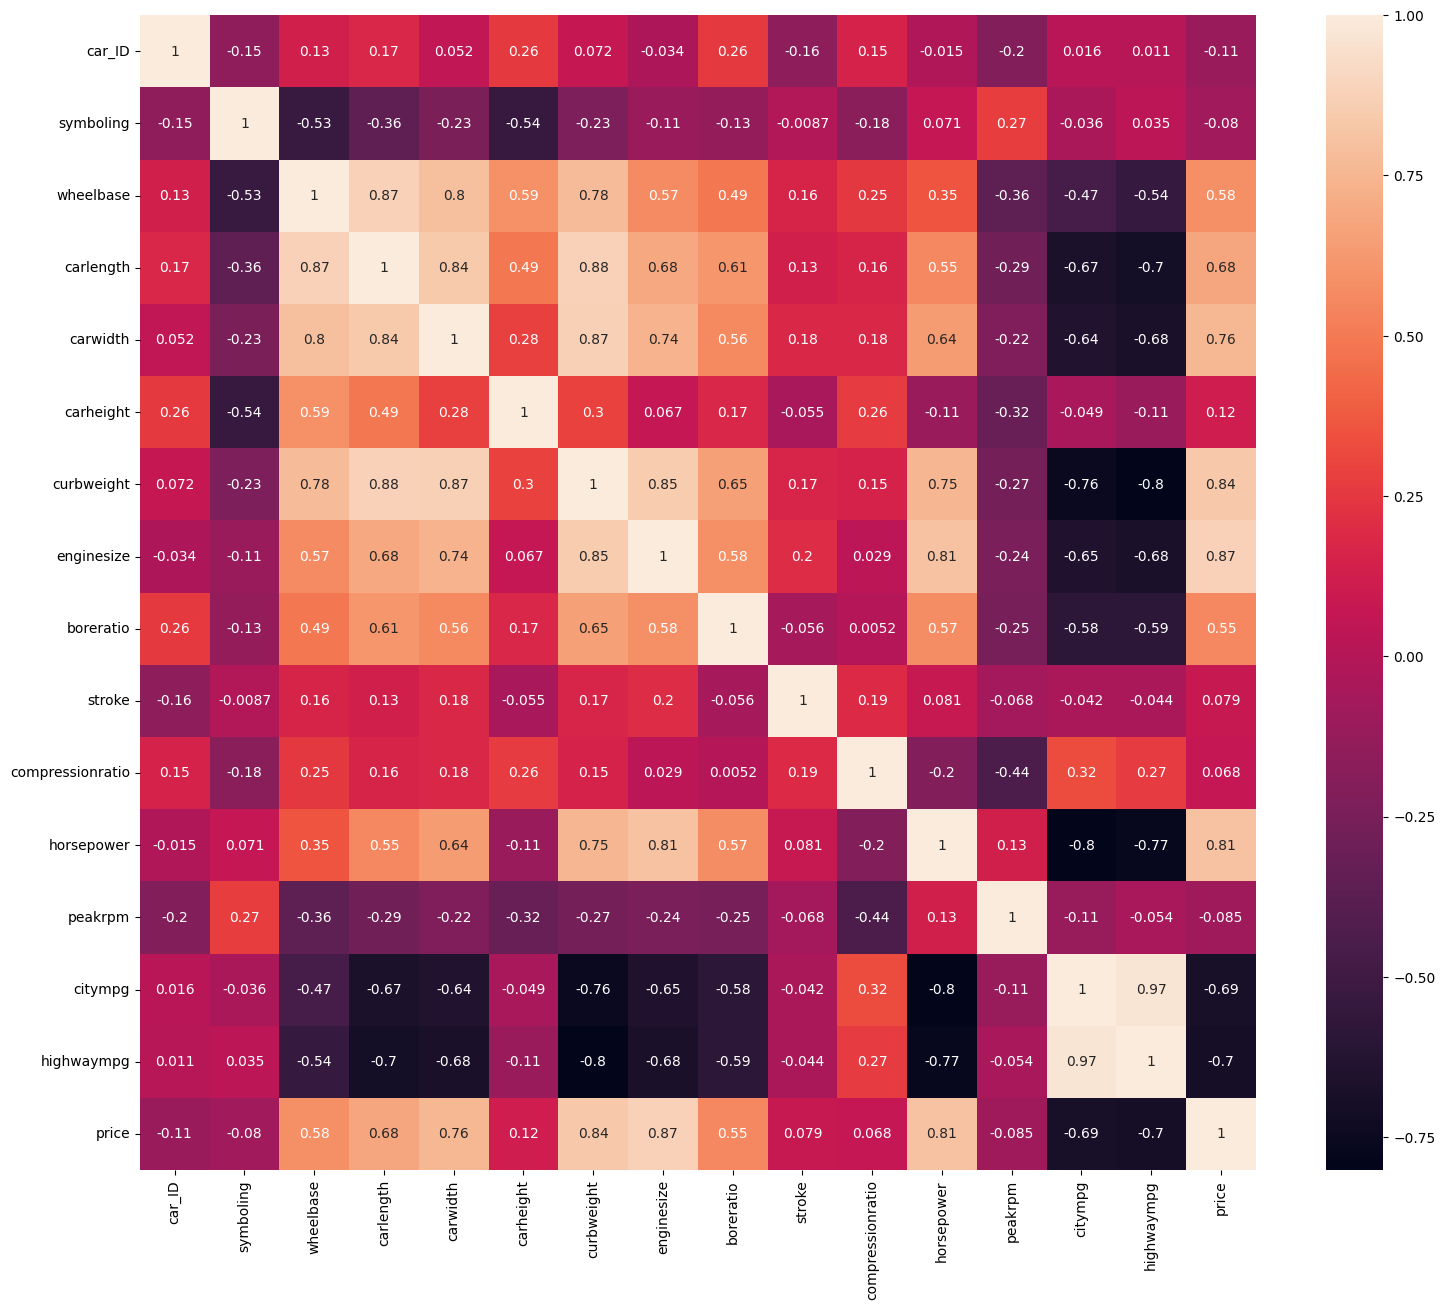

In [ ]:
# Checa la correlación entre todas las variables usando un "heat map"
fig,ax = plt.subplots(1,1,figsize=(18,15))
sns.heatmap(df.corr(),annot=True)



1.   Construye la matriz de caracteristicas X y el vector de target t.

1.   Normaliza las caracteristicas y procede a generar el modelo.

1.   Usa el 20% de los datos como conjunto de validación.
2.   Utiliza Keras ( ) para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.

1.   Posteriormente utiliza scikit-learn para comprobar tu resultado

In [66]:
# Construye la matriz de caracteristicas X y el vector de target t.

Xh = all_vars[0:4]
th = all_vars[1]


# Normaliza las caracteristicas y procede a generar el modelo.
# Usa el 20% de los datos como conjunto de validación.
# Utiliza Keras () para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.






In [ ]:
# Creamos el metodo de Gradiente Descendiente

def compute_cost(X, t, w):
    fw = w[0]
    for i in range(X.shape[0]):
      fw += w[i+1]*X[i]

    cost = np.sum((fw - t)**2)
    cost /= (2 * len(t) )
    return cost

def compute_gradient(X, t, w):
    dw = np.zeros(len(w))
    fw = w[0]
    for i in range(X.shape[0]):
      fw += w[i+1] * X[i]

    dw[0] = np.sum(fw - t)/len(t)

    for j in range(X.shape[0]):
      dw[j+1] = np.sum((fw - t) * X[j])/len(t)
    return dw

def gradient_descent(x, y, w, alpha, num_iters, cost_function, gradient_function):
    cost=[]
    for i in range(num_iters):
        dj_dw = gradient_function(x, y, w)
        for j in range(len(w)):
          w[j]  = w[j] - alpha * dj_dw[j]
        cost.append(cost_function(x, y, w))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
          print(f"Iteration {i:4}: Cost {cost[-1]:0.5e} ",
                  f"w[0]: {w[0]: 0.5e}, w[1]:{w[1]: 0.5e},w[2]:{w[1]: 0.5e},w[3]:{w[1]: 0.5e}")

    return w,cost

In [69]:
# Posteriormente utiliza scikit-learn para comprobar tu resultado.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
df_train, df_test = train_test_split(all_vars, train_size=0.7, test_size=0.3, random_state=100)

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [70]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,...,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,...,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,...,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,...,1,0,0,0,0,1,0,0,0,0


In [71]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,...,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,...,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
# Prueba con otros modelos, donde uses mas o menos caracteristicas. ¿cuál es el modelo que mejor desempeño tiene?